In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.layers import BatchNormalization, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Step 1: Load and Preprocess the Data
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize the images to have mean 0 and standard deviation 1
mean = train_images.mean(axis=(0, 1, 2), keepdims=True)
std = train_images.std(axis=(0, 1, 2), keepdims=True)
train_images = (train_images - mean) / std
test_images = (test_images - mean) / std


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
# Step 2: Data Augmentation
# Define data augmentation pipeline using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,          # Rotate images up to 15 degrees
    horizontal_flip=True,       # Randomly flip images horizontally
    width_shift_range=0.1,      # Randomly shift images horizontally by 10% of the width
    height_shift_range=0.1      # Randomly shift images vertically by 10% of the height
)
datagen.fit(train_images)

In [4]:
# Step 3: Define the Model Architecture
# Build a convolutional neural network (CNN) using Keras Sequential API
model = models.Sequential()

# Convolutional Block 1
model.add(layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(),
                        input_shape=(32, 32, 3)))  # First convolutional layer
model.add(BatchNormalization())                    # Normalize activations
model.add(layers.Activation('relu'))               # Apply ReLU activation
model.add(layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2()))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))   # Down-sample the feature maps
model.add(Dropout(0.2))                            # Regularization using Dropout

# Convolutional Block 2
model.add(layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2()))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2()))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Convolutional Block 3
model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2()))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2()))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Fully Connected Layer
model.add(layers.Flatten())                        # Flatten the 3D feature maps into 1D vector
model.add(layers.Dense(10))                        # Output layer with 10 units for 10 classes

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Step 4: Compile the Model
# Define optimizer and compile the model
optimizer = Adam(learning_rate=0.001)  # Use Adam optimizer with initial learning rate 0.001
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Step 5: Define Callbacks
# Learning rate scheduler to adjust the learning rate during training
# Learning rate scheduler to adjust the learning rate during training
def lr_scheduler(epoch):
    if epoch < 30:
        return 0.001
    else:
        return 0.0001  # Fixed indentation here

# Define lr_callback outside the lr_scheduler function
lr_callback = LearningRateScheduler(lr_scheduler)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1,
                                patience=15, restore_best_weights=True)

In [8]:
# Step 6: Train the Model
# Train the model using augmented data and defined callbacks
history = model.fit(datagen.flow(train_images, train_labels, batch_size=100),
                    epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[lr_callback, early_stopping])


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 57s 88ms/step - accuracy: 0.3325 - loss: 6.2680 - val_accuracy: 0.4271 - val_loss: 2.1785 - learning_rate: 0.0010
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 70s 81ms/step - accuracy: 0.5175 - loss: 1.8477 - val_accuracy: 0.5040 - val_loss: 2.0817 - learning_rate: 0.0010
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 54s 108ms/step - accuracy: 0.5630 - loss: 1.7367 - val_accuracy: 0.6228 - val_loss: 1.5876 - learning_rate: 0.0010
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 69s 82ms/step - accuracy: 0.5847 - loss: 1.6936 - val_accuracy: 0.3870 - val_loss: 2.2811 - learning_rate: 0.0010
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.6046 - loss: 1.6477 - val_accuracy: 0.5203 - val_loss: 1.9554 - learning_rate: 0.0010
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.6219 - loss: 1.5937 - val_accuracy: 0.6194 - val_loss: 1.5830 - learning_rate: 0.0010
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.6316 - loss: 1.559

Test Accuracy: 0.8565
Test Loss: 0.5443
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


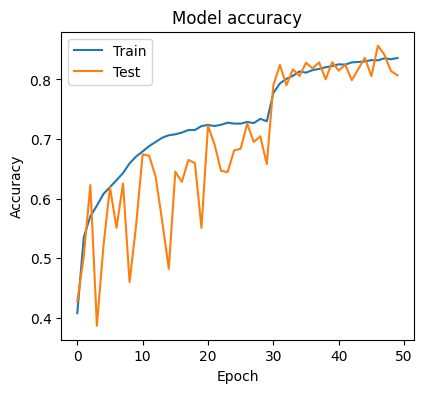

In [9]:
# Step 7: Evaluate the Model
# Evaluate the trained model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predict on the test dataset
y_pred_logits = model.predict(test_images)
y_pred = np.argmax(y_pred_logits, axis=1)  # Convert logits to class predictions
y_true = test_labels.flatten()             # Flatten true labels for evaluation

# Plot training & validation accuracy and loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

In [10]:
# Step 8: Compute Metrics
# Generate a classification report
report = classification_report(y_true, y_pred, target_names=[
    "Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"
], digits=4)
print("\nClassification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

    Airplane     0.8528    0.8690    0.8608      1000
  Automobile     0.9319    0.9440    0.9379      1000
        Bird     0.8030    0.8030    0.8030      1000
         Cat     0.8144    0.6670    0.7334      1000
        Deer     0.8588    0.8270    0.8426      1000
         Dog     0.8339    0.7530    0.7914      1000
        Frog     0.8296    0.9200    0.8725      1000
       Horse     0.8342    0.9360    0.8822      1000
        Ship     0.9314    0.9100    0.9206      1000
       Truck     0.8707    0.9360    0.9022      1000

    accuracy                         0.8565     10000
   macro avg     0.8561    0.8565    0.8546     10000
weighted avg     0.8561    0.8565    0.8546     10000



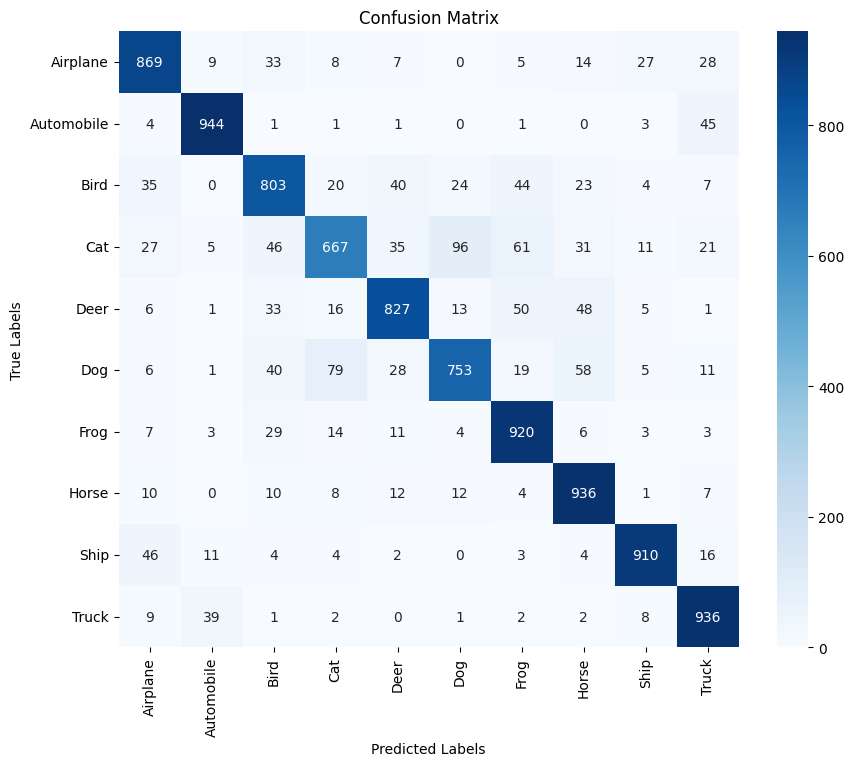

In [13]:
# Step 9: Visualize the Confusion Matrix
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[
    "Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"
], yticklabels=[
    "Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"
])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [14]:
model.save('CNN_FinalModel.keras')